In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
mobility_effects = pd.read_csv('../results/causal_impact/mobility_effects_6_25.csv',index_col=0)
rt_effects = pd.read_csv('../results/causal_impact/rt_effects_6_25.csv',index_col=0)
case_growth_effects = pd.read_csv('../results/causal_impact/case_growth_effects_6_25.csv',index_col=0)
death_rate_effects = pd.read_csv('../results/causal_impact/death_rate_effects_6_25.csv',index_col=0)


In [23]:
cols = ['Phase 1 abs','Phase 2 abs','Phase 3 abs','Phase 4 abs','Phase 5 abs','Phase 6 abs']
mobility_df = mobility_effects[cols]
rt_df = rt_effects[cols]
case_growth_df = case_growth_effects[cols]
death_rate_df = death_rate_effects[cols]

In [24]:
mobility_df.columns = [str(col) + '_mobility' for col in mobility_df.columns]
rt_df.columns = [str(col) + '_rt' for col in rt_df.columns]
case_growth_df.columns = [str(col) + '_case_growth' for col in case_growth_df.columns]
death_rate_df.columns = [str(col) + '_death_rate' for col in death_rate_df.columns]


In [25]:
death_rate_df.head()

,Phase 1 abs_death_rate,Phase 2 abs_death_rate,Phase 3 abs_death_rate,Phase 4 abs_death_rate,Phase 5 abs_death_rate,Phase 6 abs_death_rate
1,1.157527e-03,-0.001485,-0.001284,-0.000398,0.012049,0.074090
2,-8.570000e-05,-0.000161,-0.000174,-0.000099,0.004573,-0.006392
3,-4.460000e-05,-0.000089,0.000091,0.000205,0.001740,0.004469
4,3.040000e-07,0.000136,0.000316,0.000453,0.001047,0.004085
5,-1.530000e-05,-0.000004,0.000084,0.001136,0.000496,0.009118


In [26]:
merged_df = pd.concat([mobility_df,rt_df,case_growth_df,death_rate_df],axis=1)
merged_df.head()

,Phase 1 abs_mobility,Phase 2 abs_mobility,Phase 3 abs_mobility,Phase 4 abs_mobility,Phase 5 abs_mobility,Phase 6 abs_mobility,Phase 1 abs_rt,Phase 2 abs_rt,Phase 3 abs_rt,Phase 4 abs_rt,...,Phase 3 abs_case_growth,Phase 4 abs_case_growth,Phase 5 abs_case_growth,Phase 6 abs_case_growth,Phase 1 abs_death_rate,Phase 2 abs_death_rate,Phase 3 abs_death_rate,Phase 4 abs_death_rate,Phase 5 abs_death_rate,Phase 6 abs_death_rate
1,7.828003,38.170056,28.707928,28.404871,25.811213,-2.796046,-0.338702,0.481433,0.814444,0.581236,...,0.051075,0.012318,0.076906,0.004852,1.157527e-03,-0.001485,-0.001284,-0.000398,0.012049,0.074090
2,33.784540,40.900482,25.454116,23.833325,7.733984,7.733984,-0.303343,1.055994,-1.079819,-1.367304,...,0.046615,0.042699,-0.095868,0.048402,-8.570000e-05,-0.000161,-0.000174,-0.000099,0.004573,-0.006392
3,46.828169,44.193082,32.021887,33.688032,5.676387,5.676387,0.239724,0.236168,-0.213304,-1.328627,...,0.075336,-0.155836,-0.088153,-0.027808,-4.460000e-05,-0.000089,0.000091,0.000205,0.001740,0.004469
4,-4.865518,43.172052,31.858722,30.579258,34.023714,-8.904208,-1.134781,-0.967503,-0.566900,-0.536493,...,-0.008509,-0.053986,-0.036210,0.003678,3.040000e-07,0.000136,0.000316,0.000453,0.001047,0.004085
5,16.118588,46.817228,29.936802,21.335996,20.127947,-1.692473,-1.457311,0.326589,0.239336,-0.635810,...,0.180299,-0.053062,-0.193907,0.015983,-1.530000e-05,-0.000004,0.000084,0.001136,0.000496,0.009118


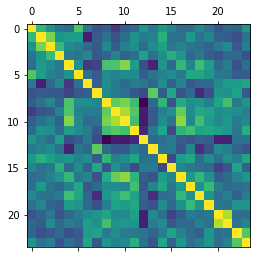

In [37]:
corr_ = merged_df.corr(method='pearson')

plt.matshow(merged_df.corr(method='spearman'))
plt.show()

In [53]:
# fig=corr_.style.background_gradient(cmap='coolwarm').set_precision(2)
# plt.savefig("../results/causal_impact/phase_outcome_correlation.png")
# plt.close()
f, ax = plt.subplots(figsize=(11, 9))
f.patch.set_facecolor('white')

sns.heatmap(corr_,cmap="coolwarm", annot=False)
# plt.show()
plt.savefig("../results/causal_impact/phase_outcome_correlation.png",bbox_inches='tight')
plt.close()

In [39]:
# mask = np.triu(np.ones_like(corr_, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr_, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})